In [195]:
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt


EXTRAÇÃO DOS DADOS

In [196]:
url = 'https://raw.githubusercontent.com/JBSantos88/Challenge_Telecom_X/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()

dados = pd.json_normalize(data)
dados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Dicionário de dados

    customerID: número de identificação único de cada cliente
    Churn: se o cliente deixou ou não a empresa
    gender: gênero (masculino e feminino)
    SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
    Partner: se o cliente possui ou não um parceiro ou parceira
    Dependents: se o cliente possui ou não dependentes
    tenure: meses de contrato do cliente
    PhoneService: assinatura de serviço telefônico
    MultipleLines: assisnatura de mais de uma linha de telefone
    InternetService: assinatura de um provedor internet
    OnlineSecurity: assinatura adicional de segurança online
    OnlineBackup: assinatura adicional de backup online
    DeviceProtection: assinatura adicional de proteção no dispositivo
    TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
    StreamingTV: assinatura de TV a cabo
    StreamingMovies: assinatura de streaming de filmes
    Contract: tipo de contrato
    PaperlessBilling: se o cliente prefere receber online a fatura
    PaymentMethod: forma de pagamento
    Charges.Monthly: total de todos os serviços do cliente por mês
    Charges.Total: total gasto pelo cliente


In [197]:
dados.info()

#para visualizarmos algumas informações sobre como estão estruturados os dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [198]:
dados.isnull().sum()

#para verificarmos a existência ou não de valores nulos (NaN ou None)

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


*Constatando que nenhum valor é nulo.*

---------------


In [199]:
dados.dtypes

#verificando os tipos de dados presentes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [200]:
dados.describe()

#pode ser importante obtermos algumas informações estatísticas das colunas do df.

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


Onde,

count: Quantos valores não nulos existem na coluna.

mean: Média aritmética.

std: Desvio padrão.

min: Valor mínimo.

25%: 25% dos dados estão abaixo desse valor.

50%: metade dos dados abaixo e metade acima.

75%: 75% dos dados estão abaixo desse valor.

max: Valor máximo.

In [201]:
#é interessante mudar Yes e No para 1 e 0, para facilitar as análises.

colunas_binarias = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.PaperlessBilling'
]

for col in colunas_binarias:
    dados[col] = dados[col].replace({
        'Yes': 1,
        'No': 0,
        'No phone service': 0,
        'No internet service': 0
    })
dados.head()

/tmp/ipython-input-2976377280.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados[col] = dados[col].replace({


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.3
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4


In [202]:
servicos_internet = [
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]

for col in servicos_internet:
    dados[col] = pd.to_numeric(dados[col], errors='coerce')  # valores inválidos viram NaN
    dados[col] = dados[col].fillna(0).astype(int)  # preenche NaN com 0 e transforma em int

-------------------------

*Se faz necessário buscar por possíveis inconsistências, além de apenas valores NaN e None.*

In [203]:
dados.duplicated().sum()

#checar se há linhas duplicadas que talvez seja necessário remoção

np.int64(0)

In [204]:
print(dados['Churn'].unique())

[0 1 '']


Como temos uma string vazia '', devemos tratar essa inconsistência...

In [205]:
dados['Churn'] = dados['Churn'].replace('', np.nan)
print(dados['Churn'].unique())
dados['Churn'].isnull().sum()

[ 0.  1. nan]


/tmp/ipython-input-4053492684.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['Churn'] = dados['Churn'].replace('', np.nan)


np.int64(224)

In [206]:
dados.dropna(subset=['Churn'], inplace=True)
dados['Churn'] = dados['Churn'].astype(int)
dados.reset_index(drop=True, inplace=True)
print(dados['Churn'].unique())


[0 1]


In [207]:
dados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.3
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4


In [208]:
for col in dados.columns:
  print(col, dados[col].unique())

customerID ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn [0 1]
customer.gender ['Female' 'Male']
customer.SeniorCitizen [0 1]
customer.Partner [1 0]
customer.Dependents [1 0]
customer.tenure [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
phone.PhoneService [1 0]
phone.MultipleLines [0 1]
internet.InternetService ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity [0]
internet.OnlineBackup [1 0]
internet.DeviceProtection [0 1]
internet.TechSupport [1 0]
internet.StreamingTV [1 0]
internet.StreamingMovies [0 1]
account.Contract ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling [1 0]
account.PaymentMethod ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
account.Charges.Monthly [65.6  59.9  73.9  ... 91.75 68.8  67.

-----------

*Podemos verificar a presença de outliers...*

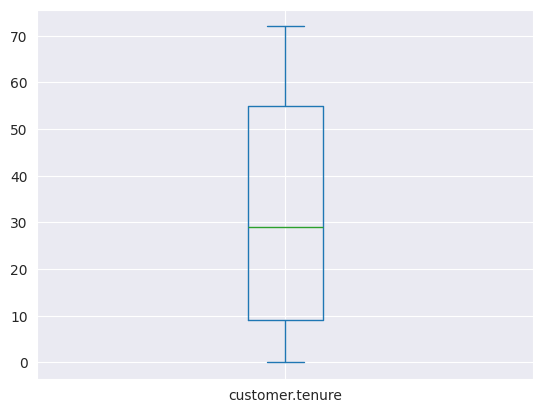

In [209]:
dados['customer.tenure'].plot(kind='box')
plt.show()

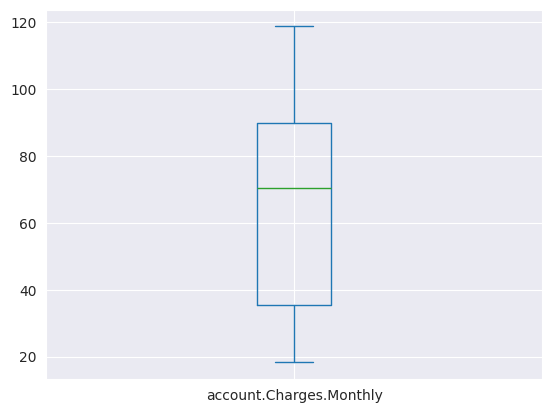

In [210]:
dados['account.Charges.Monthly'].plot(kind='box')
plt.show()

In [211]:
dados['account.Charges.Total'] = pd.to_numeric(dados['account.Charges.Total'], errors='coerce')
#convertendo 'account.Charges.Total' de object para float antes

dados['account.Charges.Total'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: account.Charges.Total
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


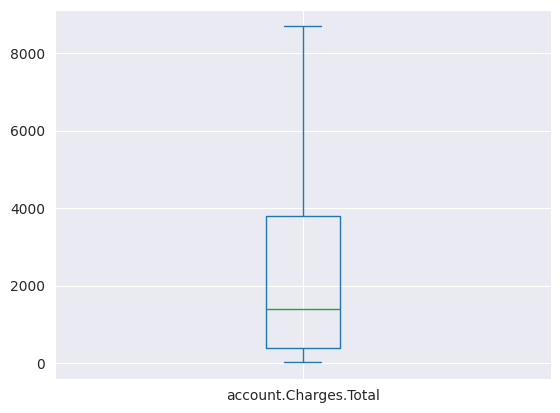

In [212]:
dados['account.Charges.Total'].plot(kind='box')
plt.show()

*Podemos aferir assim que não existem outliers para as colunas analisadas.*

----------

In [213]:
dados['account.Charges.Total'].reset_index()

,index,account.Charges.Total
0,0,593.30
1,1,542.40
2,2,280.85
3,3,1237.85
4,4,267.40
...,...,...
7038,7038,742.90
7039,7039,1873.70
7040,7040,92.75
7041,7041,4627.65


*Verificando inconsistência nas informações de servicos de internet...*

In [214]:
print(dados['internet.InternetService'].unique())
# Conta usuários sem internet
sem_internet = dados[dados['internet.InternetService'].isin([0, 'No'])]
print('Usuários sem serviços de internet:', len(sem_internet))


['DSL' 'Fiber optic' 'No']
Usuários sem serviços de internet: 1526


In [215]:

#Filtra usuários sem internet
no_internet = dados[dados['internet.InternetService'].isin([0, 'No'])]

no_internet_servicos = no_internet[servicos_internet]

dados['account.Charges.Total'] = pd.to_numeric(dados['account.Charges.Total'], errors='coerce')
dados.dropna(subset=['account.Charges.Total'], inplace=True)

print(no_internet_servicos.head())
print(dados[['account.Charges.Total']].head())


    internet.OnlineSecurity  internet.OnlineBackup  internet.DeviceProtection  \
20                        0                      0                          0   
23                        0                      0                          0   
24                        0                      0                          0   
27                        0                      0                          0   
28                        0                      0                          0   

    internet.TechSupport  internet.StreamingTV  internet.StreamingMovies  
20                     0                     0                         0  
23                     0                     0                         0  
24                     0                     0                         0  
27                     0                     0                         0  
28                     0                     0                         0  
   account.Charges.Total
0                 593.30
1            

*Sem inconsistencia.*

------

*Agora podemos calcular os valores para evazão...*

In [216]:
dados['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


-------

*Agora vamos criar a coluna 'Contas_Diarias'...*

In [217]:
dados['account.Charges.Monthly'] = pd.to_numeric(dados['account.Charges.Monthly'], errors='coerce')
dados['account.Charges.Monthly'].info()
#garantindo que 'account.Charges.Monthly' é numérico

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: account.Charges.Monthly
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 109.9 KB


In [218]:
dados['Contas_Diarias'] = dados['account.Charges.Monthly'] / 30
print(dados[['account.Charges.Monthly', 'Contas_Diarias']].head())

   account.Charges.Monthly  Contas_Diarias
0                     65.6        2.186667
1                     59.9        1.996667
2                     73.9        2.463333
3                     98.0        3.266667
4                     83.9        2.796667


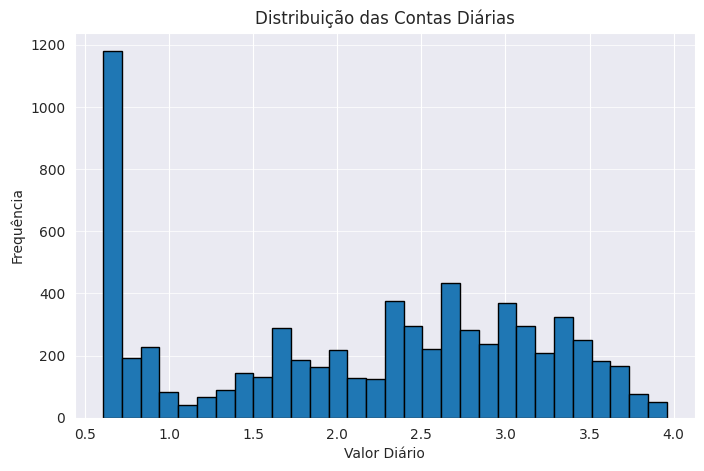

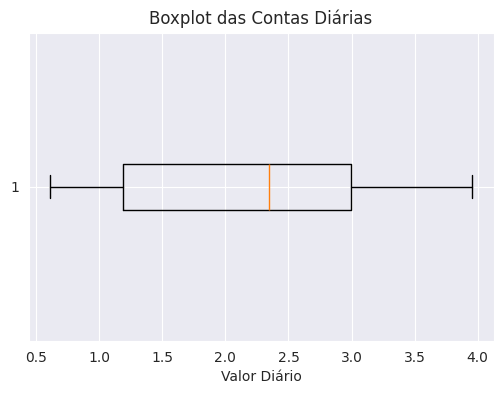

In [219]:
# Histograma
plt.figure(figsize=(8,5))
plt.hist(dados['Contas_Diarias'], bins=30, edgecolor='black')
plt.title('Distribuição das Contas Diárias')
plt.xlabel('Valor Diário')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
plt.boxplot(dados['Contas_Diarias'], vert=False)
plt.title('Boxplot das Contas Diárias')
plt.xlabel('Valor Diário')
plt.show()

--------

# ANALISE DESCRITIVA

In [220]:
variaveis_numericas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

descricao_numerica = dados[variaveis_numericas].describe()
# mediana
descricao_numerica.loc['median'] = dados[variaveis_numericas].median()
# variância
descricao_numerica.loc['variance'] = dados[variaveis_numericas].var()

print("Análise descritiva das variáveis numéricas:")
print(descricao_numerica)

# Análise descritiva de variáveis categóricas
variaveis_categoricas = ['Churn', 'customer.Partner', 'customer.SeniorCitizen',
                         'customer.Dependents', 'customer.gender', 'account.Contract']

print("\nDistribuição de frequências das variáveis categóricas:")
for col in variaveis_categoricas:
    print(f"\nColuna: {col}")
    print(dados[col].value_counts())
    print(dados[col].value_counts(normalize=True)*100)  # Percentual


Análise descritiva das variáveis numéricas:
          customer.tenure  account.Charges.Monthly  account.Charges.Total
count         7032.000000              7032.000000           7.032000e+03
mean            32.421786                64.798208           2.283300e+03
std             24.545260                30.085974           2.266771e+03
min              1.000000                18.250000           1.880000e+01
25%              9.000000                35.587500           4.014500e+02
50%             29.000000                70.350000           1.397475e+03
75%             55.000000                89.862500           3.794738e+03
max             72.000000               118.750000           8.684800e+03
median          29.000000                70.350000           1.397475e+03
variance       602.469774               905.165825           5.138252e+06

Distribuição de frequências das variáveis categóricas:

Coluna: Churn
Churn
0    5163
1    1869
Name: count, dtype: int64
Churn
0    73.42150

----------------------------

# Vamos agora analisar a Evazão...

Evasão:
Churn
0    5163
1    1869
Name: count, dtype: int64

Percentual:
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


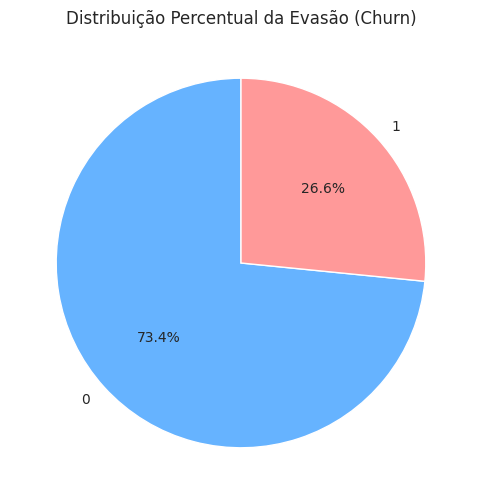

In [221]:
contagem_churn = dados['Churn'].value_counts()

# Percentual
percentual_churn = dados['Churn'].value_counts(normalize=True) * 100

print("Evasão:")
print(contagem_churn)
print("\nPercentual:")
print(percentual_churn)

# Visualização gráfica
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(percentual_churn, labels=percentual_churn.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Distribuição Percentual da Evasão (Churn)')
plt.show()



Evasão por customer.gender (número de clientes):
customer.gender
Female    939
Male      930
Name: Churn, dtype: int64


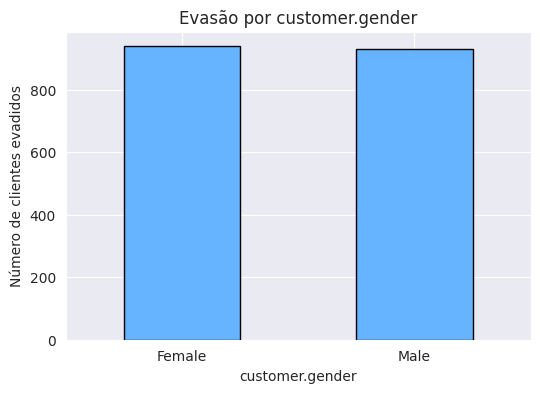


Evasão por customer.Partner (número de clientes):
customer.Partner
0    1200
1     669
Name: Churn, dtype: int64


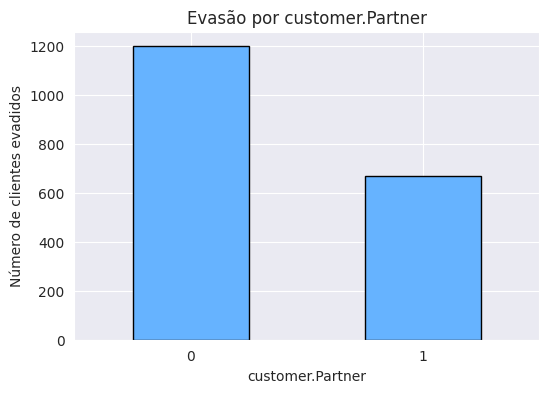


Evasão por customer.SeniorCitizen (número de clientes):
customer.SeniorCitizen
0    1393
1     476
Name: Churn, dtype: int64


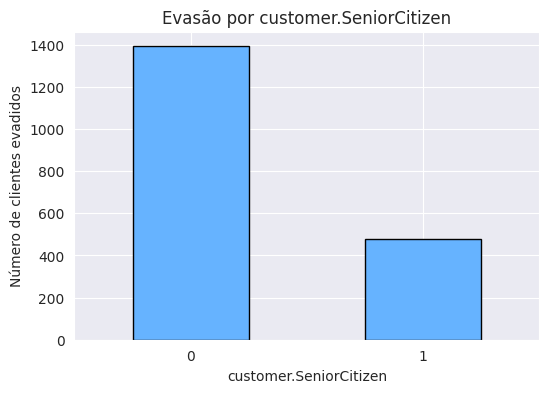


Evasão por customer.Dependents (número de clientes):
customer.Dependents
0    1543
1     326
Name: Churn, dtype: int64


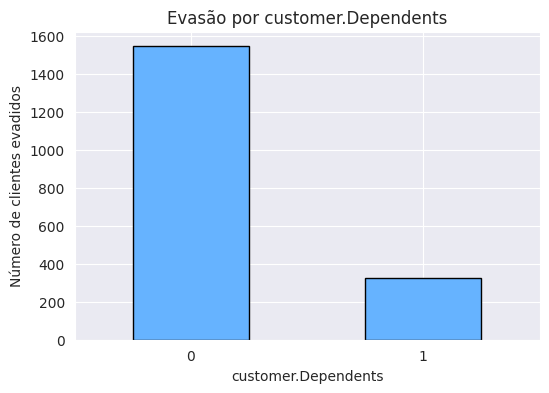

In [222]:
import matplotlib.pyplot as plt

categorias = ['customer.gender','customer.Partner', 'customer.SeniorCitizen', 'customer.Dependents']

for cat in categorias:
    # Agrupa por categoria e soma os casos de Churn = 1
    contagem = dados.groupby(cat)['Churn'].sum()

    print(f"\nEvasão por {cat} (número de clientes):")
    print(contagem)

    # Gráfico de barras para contagem
    plt.figure(figsize=(6,4))
    contagem.plot(kind='bar', color='#66b3ff', edgecolor='black')
    plt.ylabel('Número de clientes evadidos')
    plt.title(f'Evasão por {cat}')
    plt.xticks(rotation=0)
    plt.show()


Evasão por Tipo de Contrato (Número de Clientes Evadidos):
account.Contract
Month-to-month    1655
One year           166
Two year            48
dtype: int64


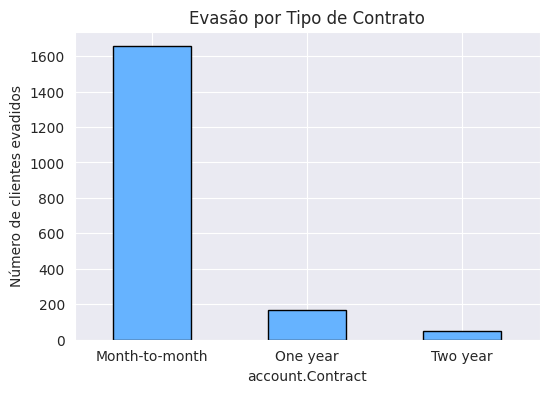

In [223]:
# Número de clientes que evadiram por tipo de contrato
evasao_por_contrato = dados[dados['Churn']==1].groupby('account.Contract').size()
print("Evasão por Tipo de Contrato (Número de Clientes Evadidos):")
print(evasao_por_contrato)

plt.figure(figsize=(6,4))
evasao_por_contrato.plot(kind='bar', color='#66b3ff', edgecolor='black')
plt.ylabel('Número de clientes evadidos')
plt.title('Evasão por Tipo de Contrato')
plt.xticks(rotation=0)
plt.show()


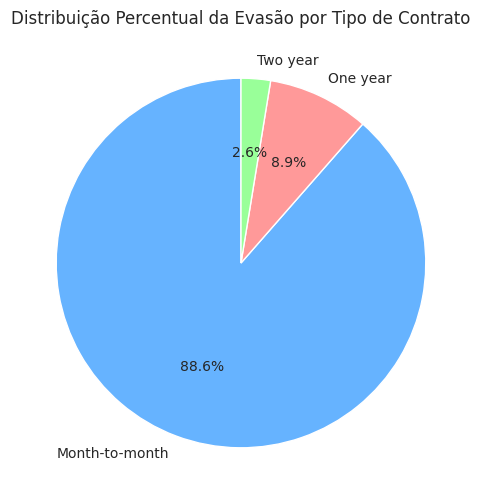

In [224]:
evasao_por_contrato_percentual = (evasao_por_contrato / evasao_por_contrato.sum()) * 100

# Gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(evasao_por_contrato_percentual,
        labels=evasao_por_contrato_percentual.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff','#ff9999','#99ff99'])
plt.title('Distribuição Percentual da Evasão por Tipo de Contrato')
plt.show()

*Podemos ver que os contratos do tipo mês-a-mês possuem maior evasão.*

-----------

In [225]:
evasao_metodo_pagamento = dados[(dados['Churn']==1)].groupby('account.PaymentMethod').size()

total_churned = len(dados[dados['Churn']==1])

evasao_metodo_pagamento_percentagem = (evasao_metodo_pagamento / total_churned) * 100
print("Evasão por Método de Pagamento :")
print(evasao_metodo_pagamento_percentagem)

Evasão por Método de Pagamento :
account.PaymentMethod
Bank transfer (automatic)    13.804173
Credit card (automatic)      12.413055
Electronic check             57.303371
Mailed check                 16.479401
dtype: float64


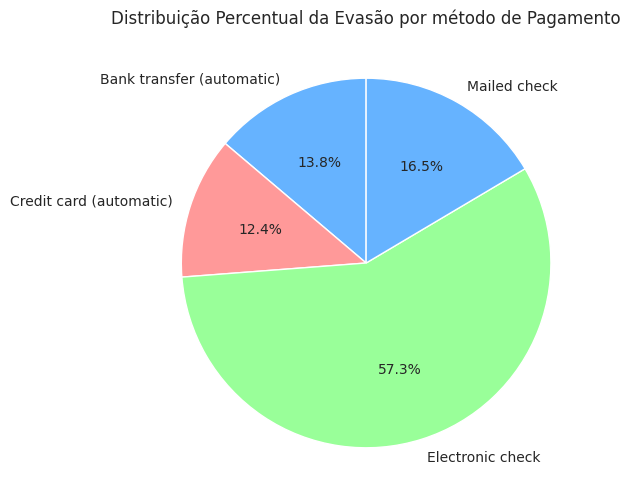

In [226]:
plt.figure(figsize=(6,6))
plt.pie(evasao_metodo_pagamento_percentagem,
        labels=evasao_metodo_pagamento_percentagem.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff','#ff9999','#99ff99'])
plt.title('Distribuição Percentual da Evasão por método de Pagamento')
plt.show()

*Onde podemos ver um alto índice de evasão pelo método de pagamento por Check eletrônico.*

---------
*Pelo tipo de serviço de internet...*

Evasão por Serviços de Internet :
internet.InternetService
DSL            24.558587
Fiber optic    69.395399
No              6.046014
dtype: float64


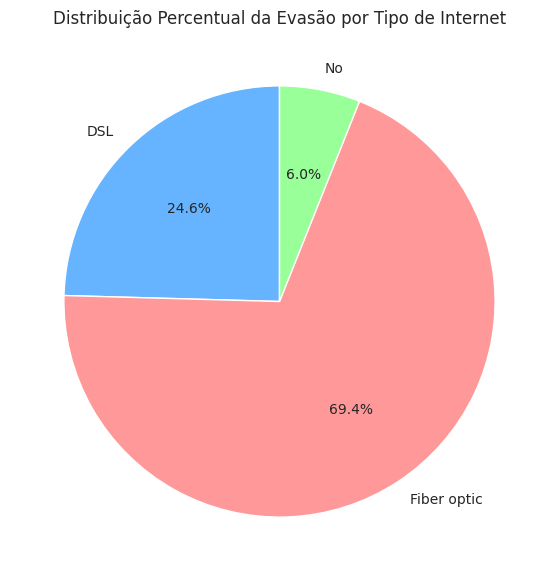

In [227]:
# Filtra clientes que evadiram
clientes_evazao = dados[dados['Churn']==1]

evasao_servico_internet = clientes_evazao.groupby('internet.InternetService').size()
total_churned = len(clientes_evazao)
evasao_servico_internet_percentual = (evasao_servico_internet / total_churned) * 100

print("Evasão por Serviços de Internet :")
print(evasao_servico_internet_percentual)

# Gráfico de pizza
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.pie(evasao_servico_internet_percentual,
        labels=evasao_servico_internet_percentual.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff','#ff9999','#99ff99'])
plt.title('Distribuição Percentual da Evasão por Tipo de Internet')
plt.show()



*A fibra óptica lidera nas evasões.*

Matriz de Correlação:
                        customer.Dependents  customer.Partner     Churn  \
customer.Dependents                1.000000          0.452269 -0.163128   
customer.Partner                   0.452269          1.000000 -0.149982   
Churn                             -0.163128         -0.149982  1.000000   
customer.SeniorCitizen            -0.210550          0.016957  0.150541   
phone.PhoneService                -0.001078          0.018397  0.011691   

                        customer.SeniorCitizen  phone.PhoneService  
customer.Dependents                  -0.210550           -0.001078  
customer.Partner                      0.016957            0.018397  
Churn                                 0.150541            0.011691  
customer.SeniorCitizen                1.000000            0.008392  
phone.PhoneService                    0.008392            1.000000  


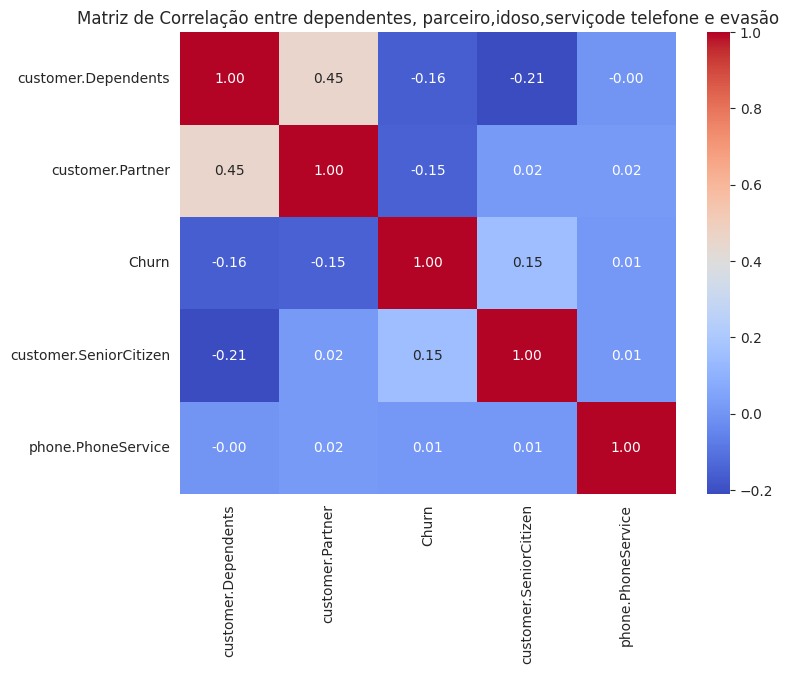

In [228]:
# Selecionando as colunas de interesse
colunas_interesse = ['customer.Dependents', 'customer.Partner', 'Churn', 'customer.SeniorCitizen', 'phone.PhoneService']

# Calculando a matriz de correlação
matriz_correlacao = dados[colunas_interesse].corr()

# Exibindo a correlação
print("Matriz de Correlação:")
print(matriz_correlacao)

# Opcional: visualização com mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre dependentes, parceiro,idoso,serviçode telefone e evasão')
plt.show()


Com isso podemos aferir que:
*   Clientes com dependentes tendem um pouco menos a evadir.
*   Clientes com parceiro(a) também têm uma leve tendência a permanecer.
* Clientes idosos têm uma leve tendência a evadir mais que os mais jovens.
* Ter serviço telefônico não parece influenciar a evasão.

/tmp/ipython-input-855434399.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  evasao_trimestre = dados.groupby('trimestre')['Churn'].sum()
/tmp/ipython-input-855434399.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_trimestre = dados.groupby('trimestre')['Churn'].count()


Número de clientes evadidos por trimestre de contrato:
trimestre
0-2      597
3-5      187
6-8      139
9-11     114
12-14     99
15-17     78
18-20     54
21-23     63
24-26     51
27-29     43
30-32     49
33-35     37
36-38     42
39-41     41
42-44     27
45-47     35
48-50     33
51-53     35
54-56     27
57-59     25
60-62     17
63-65     26
66-68     27
69-71     23
Name: Churn, dtype: int64

Percentual de evasão por trimestre de contrato:
trimestre
0-2      56.803045
3-5      44.630072
6-8      37.265416
9-11     34.337349
12-14    34.859155
15-17    29.545455
18-20    26.086957
21-23    23.420074
24-26    22.173913
27-29    21.393035
30-32    24.747475
33-35    18.226601
36-38    23.333333
39-41    20.603015
42-44    15.254237
45-47    16.990291
48-50    16.336634
51-53    16.055046
54-56    12.918660
57-59    12.315271
60-62     7.798165
63-65    10.612245
66-68     9.215017
69-71     3.533026
Name: Churn, dtype: float64


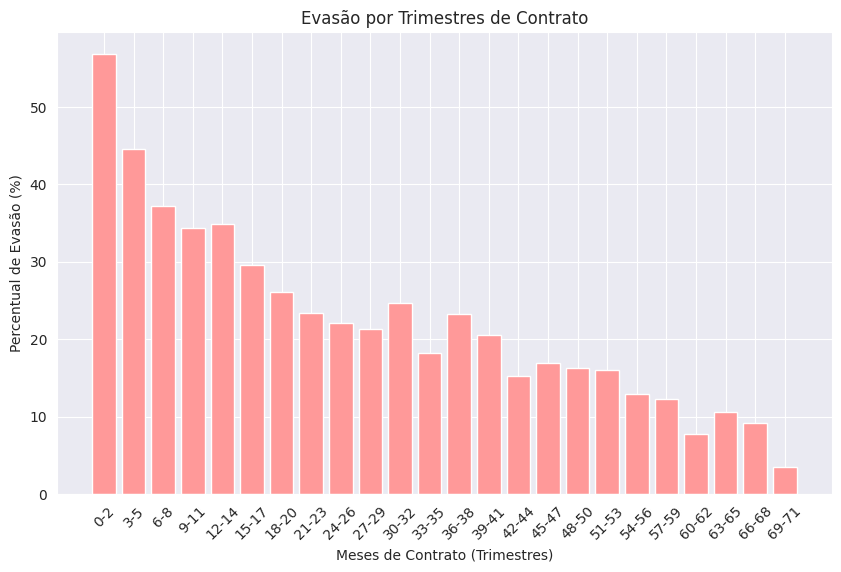

In [229]:
# faixas trimestrais de meses de contrato
# 0-3, 4-6, 7-9, ...
bins = list(range(0, dados['customer.tenure'].max() + 3, 3))
labels = [f"{b}-{b+2}" for b in bins[:-1]]
dados['trimestre'] = pd.cut(dados['customer.tenure'], bins=bins, labels=labels, right=True)

evasao_trimestre = dados.groupby('trimestre')['Churn'].sum()

# total de clientes por trimestre para obter percentual
total_trimestre = dados.groupby('trimestre')['Churn'].count()
evasao_trimestre_percentual = (evasao_trimestre / total_trimestre) * 100

print("Número de clientes evadidos por trimestre de contrato:")
print(evasao_trimestre)
print("\nPercentual de evasão por trimestre de contrato:")
print(evasao_trimestre_percentual)

plt.figure(figsize=(10,6))
plt.bar(evasao_trimestre.index, evasao_trimestre_percentual, color='#ff9999')
plt.xlabel('Meses de Contrato (Trimestres)')
plt.ylabel('Percentual de Evasão (%)')
plt.title('Evasão por Trimestres de Contrato')
plt.xticks(rotation=45)
plt.show()



Nos primeiros trimestres (0-2 meses, 3-5 meses), há o maior número absoluto de evasões:

    0-2 meses → 597 clientes evadidos

    3-5 meses → 187 clientes evadidos

Depois, o número de evasões diminui progressivamente

Matriz de Correlação serviços e evasão:
                           internet.OnlineSecurity  internet.OnlineBackup  \
internet.OnlineSecurity                        NaN                    NaN   
internet.OnlineBackup                          NaN               1.000000   
internet.DeviceProtection                      NaN               0.303058   
internet.TechSupport                           NaN               0.293705   
internet.StreamingTV                           NaN               0.281601   
internet.StreamingMovies                       NaN               0.274523   
account.Charges.Monthly                        NaN               0.441529   
Churn                                          NaN              -0.082307   

                           internet.DeviceProtection  internet.TechSupport  \
internet.OnlineSecurity                          NaN                   NaN   
internet.OnlineBackup                       0.303058              0.293705   
internet.DeviceProtection       

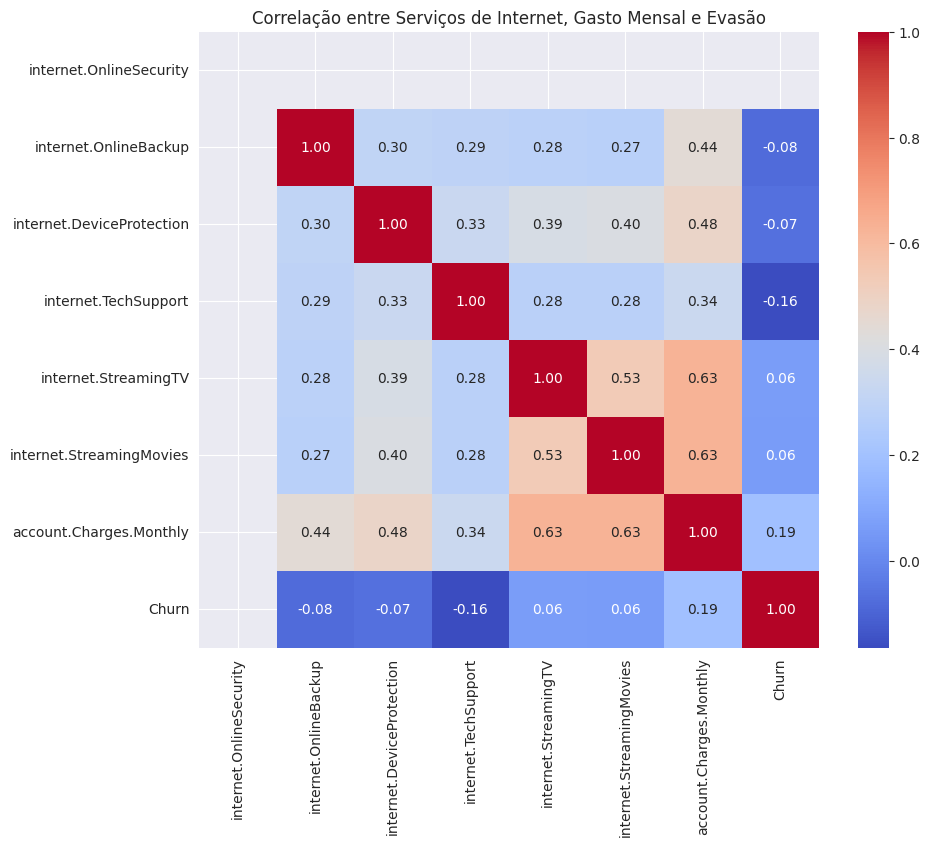

In [230]:
internet_service_cols = [
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]

for col in internet_service_cols:
    dados[col] = pd.to_numeric(dados[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0}), errors='coerce').fillna(0)

dados_with_internet = dados[dados['internet.InternetService'] != 0].copy()
colunas_para_correlacao = internet_service_cols + ['account.Charges.Monthly', 'Churn']

# Calcula a correlação
correlacao = dados_with_internet[colunas_para_correlacao].corr()

print("Matriz de Correlação serviços e evasão:")
print(correlacao)

# Heatmap visual
plt.figure(figsize=(10,8))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlação entre Serviços de Internet, Gasto Mensal e Evasão")
plt.show()


# Relatório de Análise de Evasão de Clientes (Churn) - TelecomX

---

## 1. Introdução

O objetivo deste relatório é analisar o problema de **evasão de clientes (Churn)** da TelecomX.  
A evasão de clientes é um indicador crítico, pois impacta diretamente a receita e a sustentabilidade do negócio.  
A análise busca identificar padrões, fatores associados à evasão e fornecer insights que possam ajudar a reduzir a saída de clientes.

---

## 2. Limpeza e Tratamento de Dados

Foram realizados os seguintes passos:

1. **Importação dos dados**: Carregamento do arquivo JSON contendo informações sobre clientes, serviços e faturamento.  
2. **Verificação de valores nulos e inconsistentes**:  
   - Substituição de valores vazios por `NaN`.  
   - Conversão de colunas binárias (`Yes/No`) para valores numéricos (1/0).  
   - Exclusão de registros sem informação sobre evasão (`Churn`).  
3. **Conversão de colunas numéricas**:  
   - Faturamento mensal e total convertidos para `float`.  
   - Serviços adicionais convertidos para 0/1.  
4. **Criação de novas variáveis**:  
   - `Contas_Diarias`: valor diário médio com base no faturamento mensal.  
   - Faixas de contrato (trimestres) para analisar evasão por tempo de fidelidade.

---

## 3. Análise Exploratória de Dados

### 3.1 Distribuição Geral de Evasão


Churn
0    5163
1    1869
Name: count, dtype: int64


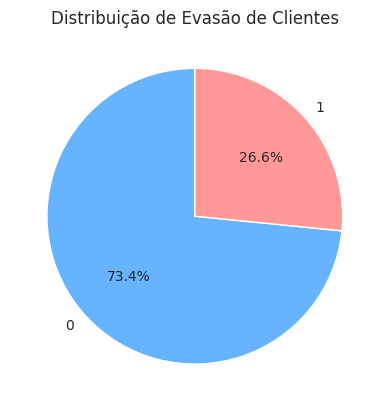

In [231]:
# Distribuição de Churn
evazao_total = dados['Churn'].value_counts()
print(evazao_total)

# Gráfico de pizza
evazao_total.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
plt.title('Distribuição de Evasão de Clientes')
plt.ylabel('')
plt.show()


### 3.2 Evasão por Categorias Demográficas

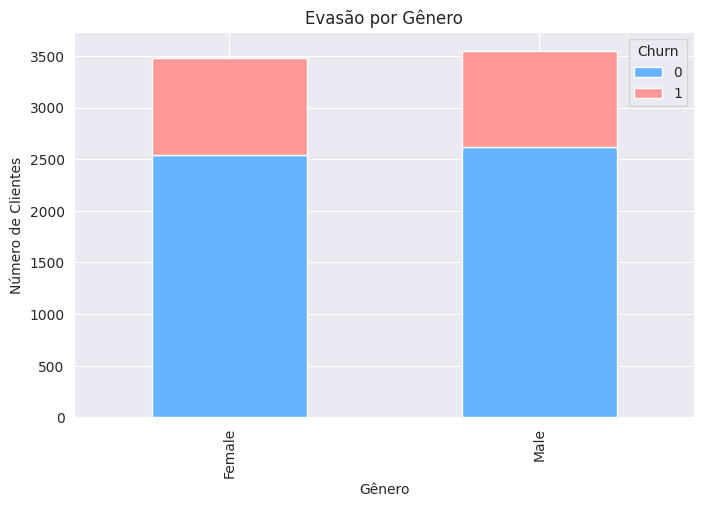

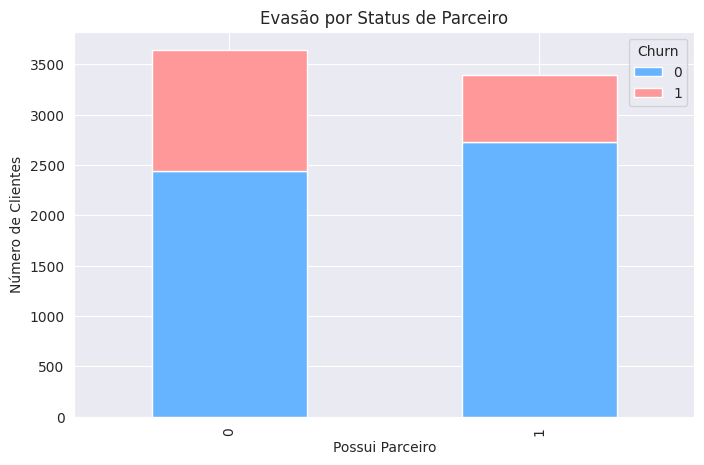

In [232]:
# Evasão por gênero
evazao_genero = dados.groupby('customer.gender')['Churn'].value_counts().unstack()
evazao_genero.plot(kind='bar', stacked=True, figsize=(8,5), color=['#66b3ff','#ff9999'])
plt.title('Evasão por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.show()

# Evasão por parceiro
evazao_parceiro = dados.groupby('customer.Partner')['Churn'].value_counts().unstack()
evazao_parceiro.plot(kind='bar', stacked=True, figsize=(8,5), color=['#66b3ff','#ff9999'])
plt.title('Evasão por Status de Parceiro')
plt.xlabel('Possui Parceiro')
plt.ylabel('Número de Clientes')
plt.show()


###3.3 Evasão por Serviços de Internet e Faturamento

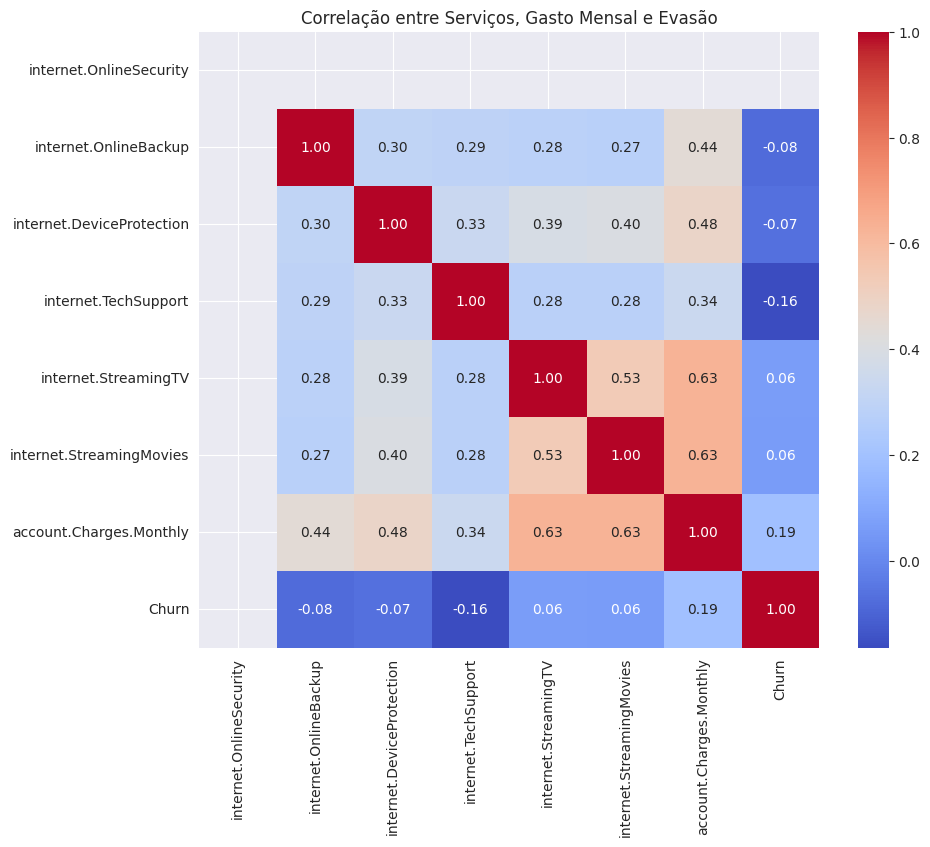

In [233]:
# Correlação serviços x evasão
internet_service_cols = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

# Heatmap da correlação
plt.figure(figsize=(10,8))
sns.heatmap(dados[internet_service_cols + ['account.Charges.Monthly', 'Churn']].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlação entre Serviços, Gasto Mensal e Evasão")
plt.show()


###3.4 Evasão por Tempo de Contrato

/tmp/ipython-input-4019121563.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  evasao_trimestral = dados.groupby(trimestre)['Churn'].sum()


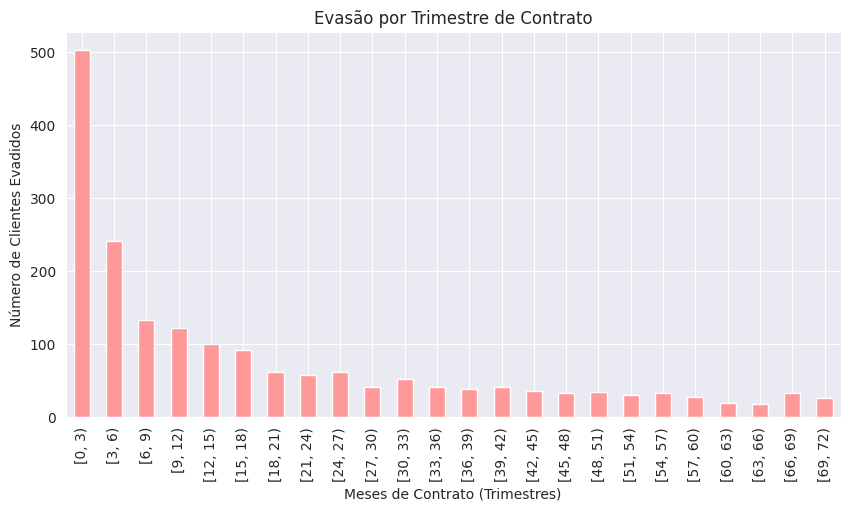

In [234]:
# Distribuição trimestral
trimestre = pd.cut(dados['customer.tenure'], bins=range(0,75,3), right=False)
evasao_trimestral = dados.groupby(trimestre)['Churn'].sum()

evasao_trimestral.plot(kind='bar', figsize=(10,5), color='#ff9999')
plt.title('Evasão por Trimestre de Contrato')
plt.xlabel('Meses de Contrato (Trimestres)')
plt.ylabel('Número de Clientes Evadidos')
plt.show()


###3.5 Distribuição de Faturamento Mensal por Evasão

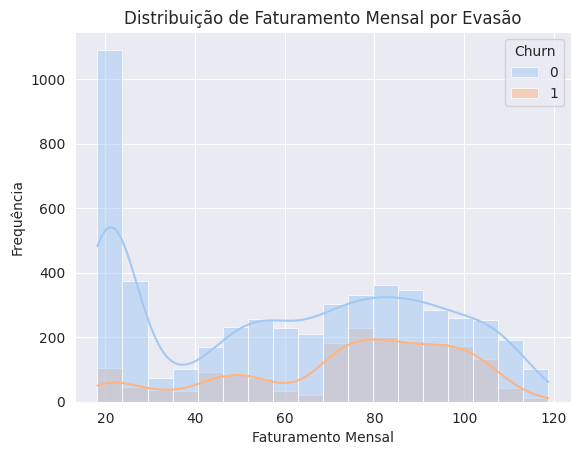

In [235]:
sns.histplot(data=dados, x='account.Charges.Monthly', hue='Churn', kde=True, palette="pastel", edgecolor="white", linewidth=0.5)
plt.title('Distribuição de Faturamento Mensal por Evasão')
plt.xlabel('Faturamento Mensal')
plt.ylabel('Frequência')
plt.show()


_______________________________

##4. Conclusões e Insights

  * Serviços de internet: Pouco impacto direto na evasão. Um suporte técnico pode reduzir levemente a evasão.

  * Gasto mensal: Clientes que gastam mais têm uma pequena tendência a evadir, mas não é determinante.

  * Tempo de contrato: Maior evasão nos primeiros 4 trimestres, indicando que clientes recém-contratados são mais vulneráveis.

  * Demografia: Clientes sem parceiro ou sem dependentes têm uma leve tendência maior de evadir; gênero não apresenta grande diferença.


______________________

##5. Recomendações

  1. Foco em suporte técnico e atendimento: Melhorar suporte e engajamento pode reduzir a evasão.

  2. Programas de retenção para novos clientes: Incentivos nos primeiros 12 meses podem reduzir a perda de clientes nos trimestres iniciais.

  3. Pacotes de serviços combinados: Embora não influenciem diretamente a evasão, podem aumentar o gasto mensal e fidelizar clientes.

  4. Monitoramento contínuo: Analisar constantemente padrões de evasão e ajustar estratégias conforme mudanças no comportamento do cliente.